In [18]:
import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)

In [1]:
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.4 MB/s eta 0:00:00


In [2]:
import dtreeviz
from dtreeviz.trees import *

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing as prep
import seaborn as sns
import sklearn.datasets as ds

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
import sklearn.metrics

In [4]:
data_iris=ds.load_iris()
df = pd.DataFrame(data_iris.data,columns=data_iris.feature_names)
names = ['sep_len','sep_wid','pet_len','pet_wid']
df = df.set_axis(names,axis = 'columns')
df

,sep_len,sep_wid,pet_len,pet_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
X = df.values
y = data_iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,
                                                    stratify = y,
                                                    random_state=42)

In [6]:
clf=DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_predict=clf.predict(X_test)

In [9]:
print('ACC: %.4f' % acc(y_predict,y_test))
print('F1 : %.4f' %  f1(y_predict,y_test, average = 'macro'))

print (classification_report(y_test, y_predict, target_names=data_iris.target_names))

ACC: 0.9667
F1 : 0.9667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.95      0.95      0.95        20
   virginica       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [28]:
plt.style.use('default')
plt.figure(figsize=(25,8))
viz = dtreeviz.model(clf,
               X_train, y_train,
               feature_names=names,
               class_names=list(data_iris.target_names),
               )

<Figure size 2500x800 with 0 Axes>

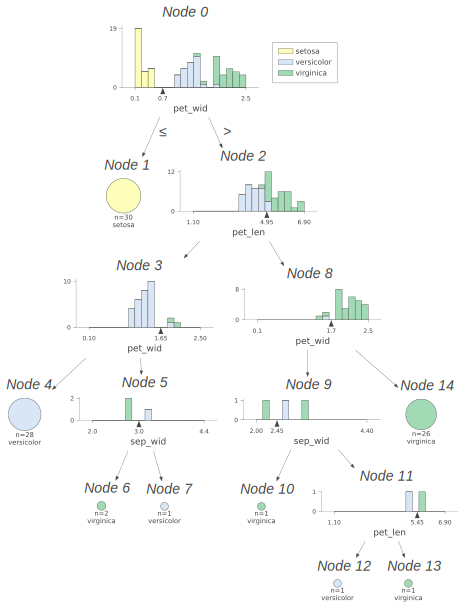

In [29]:
viz.view(show_node_labels = True)

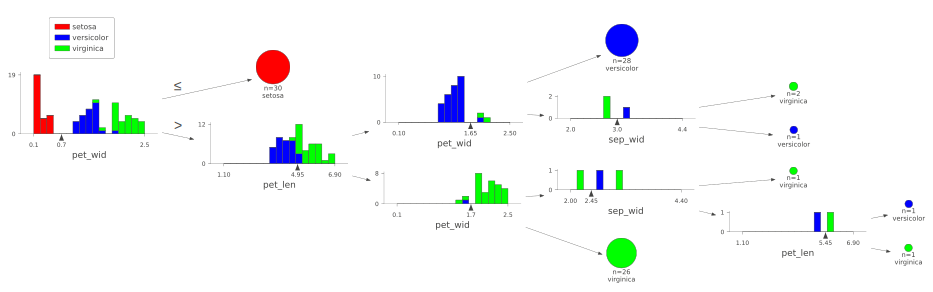

In [30]:
viz.view(orientation="LR",
         colors={'classes':((), #почему-то такое API
                            (),
                             (),
                              ('#ff0000','#0000ff','#00ff00'))}
         )

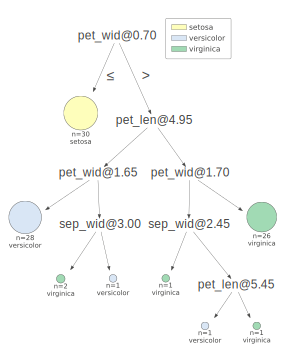

In [31]:
viz.view(fancy=False)

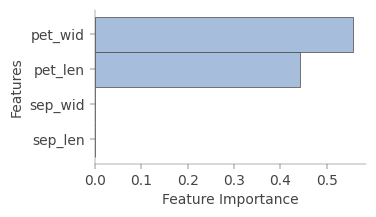

In [38]:
viz.instance_feature_importance(pd.DataFrame(X_train).iloc[0,:],
                                figsize=(3.5,2))

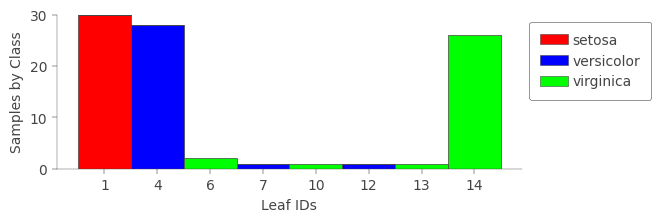

In [41]:
viz.ctree_leaf_distributions(figsize=(6,2),
         colors={'classes':((),() ,(),('#ff0000', '#0000ff', '#00ff00'))})

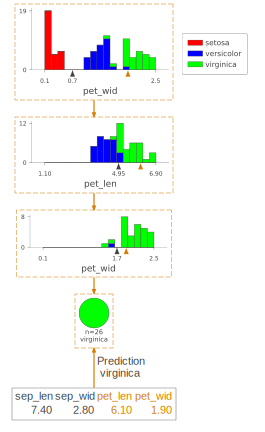

In [42]:
viz.view(x=pd.DataFrame(X_train).iloc[0,:],
         show_just_path=True,
         colors={'classes':((),() ,(),('#ff0000', '#0000ff', '#00ff00'))})